In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv("C:\\Users\\nmsmi\\DataScienceGuidedCapstone\\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
import seaborn as sns 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [5]:
df['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
!pip install numpy


In [8]:
import numpy as np 

In [9]:
!pip install scikit-learn 

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

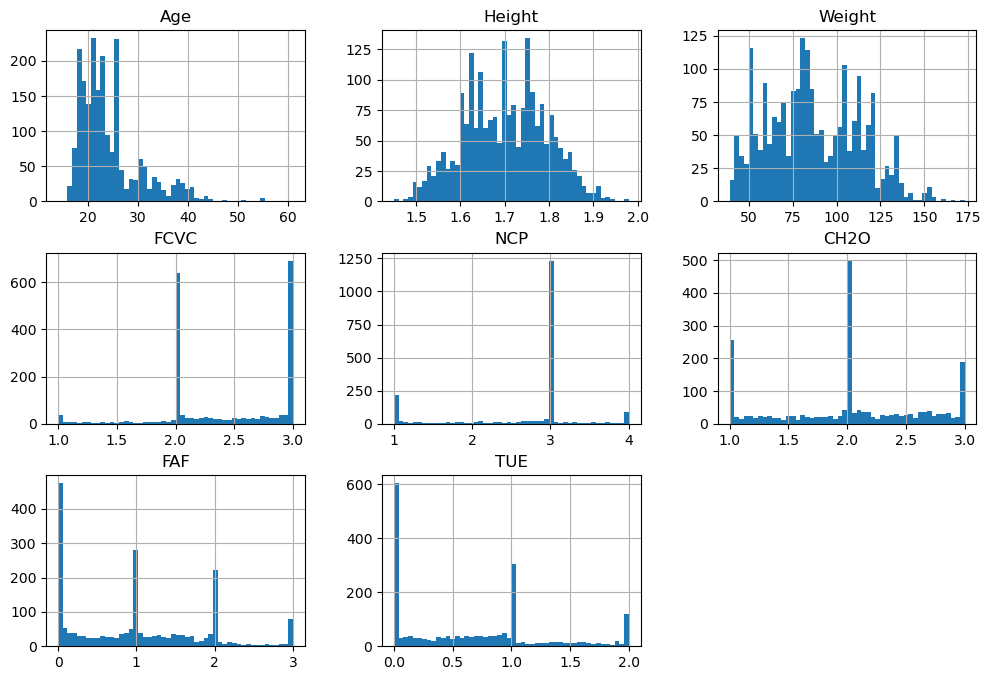

In [11]:
df.hist(bins=50, figsize=(12,8))

In [21]:
corr_matrix = df.corr(numeric_only=True)

In [22]:
corr_matrix

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


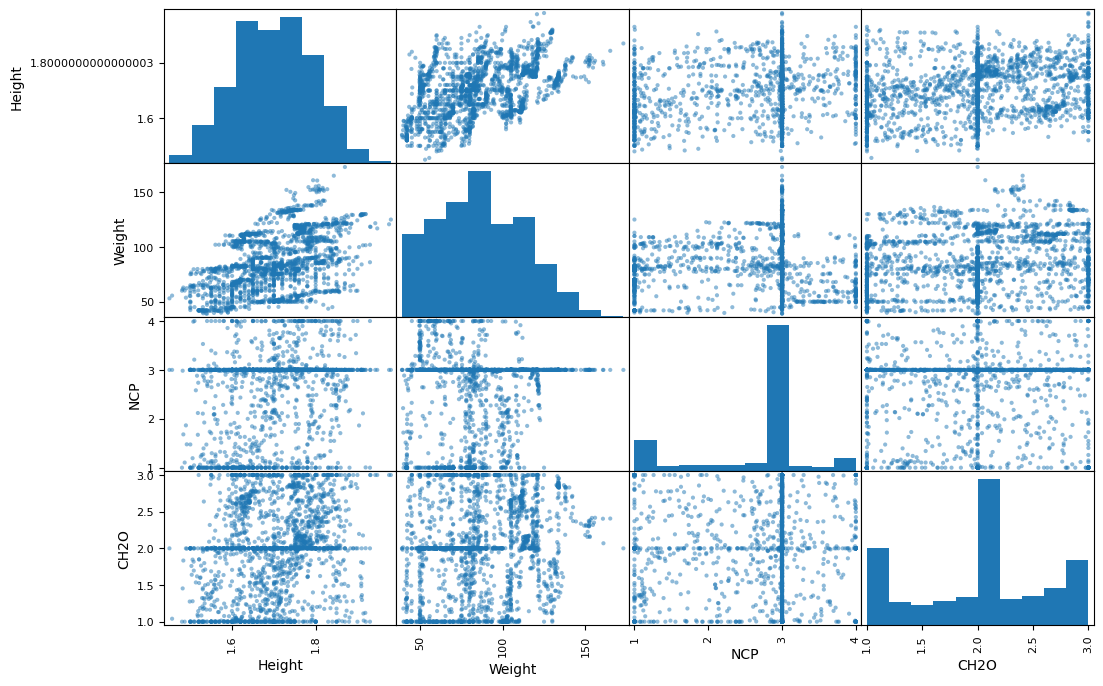

In [24]:
attributes = ['Height', 'Weight', 'NCP','CH2O']
from pandas.plotting import scatter_matrix

scatter_matrix(df[attributes], figsize=(12,8))
plt.show()

In [59]:
from sklearn.preprocessing import OrdinalEncoder 

ordinal_encoder = OrdinalEncoder() 

df_cat_encoded = ordinal_encoder.fit_transform(df[['NObeyesdad']])


In [60]:
df_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [5.],
       [6.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [61]:
ordinal_encoder.categories_

[array(['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
        'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I',
        'Overweight_Level_II'], dtype=object)]

In [54]:
from sklearn.model_selection import train_test_split 

train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)

In [55]:
len(train_set), len(test_set) 

(1688, 423)

In [74]:
X = df.iloc[:,1:2].values  #features
y = df.iloc[:,2].values  # Target variable 

x_train, x_test, y_train, y_test = train_test_split(train_set, train_set, test_size = 0.2, random_state = 42)

In [75]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values 

model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True) 
model.fit (x,y)




c:\Users\nmsmi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [76]:

from sklearn.metrics import mean_squared_error, r2_score

oob_score = model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = model.predict(x)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: -2.5696260477649693
Mean Squared Error: 1.288349493889116e-07
R-squared: 0.9999851942193261


In [78]:

X = df.iloc[:,1:2].values  #features
y = df.iloc[:,2].values  # Target variable 

x_train, x_test, y_train, y_test = train_test_split(train_set, train_set, test_size = 0.2, random_state = 42)


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()
y_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
y_numerical = df.select_dtypes(exclude=['object']).values
y = pd.concat([pd.DataFrame(y_numerical), y_categorical], axis=1).values 

model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True) 
model.fit (x,y)

oob_score = model.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = model.predict(y)

mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.26326579483887
Mean Squared Error: 0.04066982834936435
R-squared: 0.9340713038261491


c:\Users\nmsmi\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
